
# A Story of Data Discovery and Management with RDF and SPARQL

Welcome to a  journey through the landscape of RDF (Resource Description Framework) and SPARQL, where data is not just numbers and strings, but a rich tapestry of interconnected facts and relationships waiting to be explored.

## Embarking on the RDF Journey

Imagine RDF as the foundation of a vast library, where every piece of data is a book not just placed randomly on shelves, but meticulously cataloged for easy discovery. RDF allows us to define these 'books' in a way that is universally understandable, laying down a structure for the web of data.

## Navigating with SPARQL

SPARQL serves as our map and compass in this library, enabling us to find the exact data we need through its powerful query capabilities. Whether it's a simple lookup or a complex join across various datasets, SPARQL helps us chart a path to our desired information.

## Enhancing the Narrative with Tags

Tags in RDF are like keywords in a book's index, guiding us to the right information. They categorize data for better accessibility and understanding:

- **Semantic Tags** illuminate the core themes of the data.
- **Discovery Tags** connect the dots between disparate datasets.
- **Access Tags** act as gatekeepers, ensuring data privacy and security.
- **Lifecycle Tags** narrate the story of data from its inception to its conclusion.

### Metadata Categories 

#### Business/Semantic/Descriptive/Contextual Metadata:

* Provides business context, meaning, definitions, policies, and governance around data assets. Examples: Business terms, classification taxonomies, data retention rules, compliance policies, data stewardship info.
* RDF can be used to represent business/semantic metadata in a flexible, extensible way using subject-predicate-object triples to describe data concepts, relationships and rules.

  Covers Data lifecycle also 
  - Data source and creation process
  - Update schedules and frequencies
  - Data ownership and stewardship
  - Data retention and archival policies
  - Metadata based Data quality rules
  - Usage tracking and access controls
  - etc

#### Technical/Structural/Format/Physical Metadata:

* Describes the technical implementation details of data - formats, types, models, schemas, storage locations etc. Examples: Data types, database schemas, ETL logic, data profiles.
* RDF can capture some technical metadata by modeling the structure and serialization formats of datasets.

#### Operational/Process/Execution Metadata:

* Tracks the processes operating on data - job schedules, run logs, monitoring data, audit trails. Examples: Refresh schedules, system logs, performance metrics.
* RDF is less commonly used for operational metadata compared to logs/audit trails, but could potentially model process flows and execution data.

#### Social/Collaborative/User-Generated Metadata:

* Crowdsourced metadata from user annotations, comments, ratings providing interpretation and context. Examples: User annotations, issue reports, knowledge forums.
* RDF allows capturing social metadata by modeling user-generated annotations and tagging data using flexible schema-less graphs.

In summary, RDF excels at representing semantic/business metadata and social metadata due to its flexible graph data model using subject-predicate-object triples. It can also capture some technical metadata structure. However, for detailed operational/process metadata, other specialized logging/monitoring tools are more commonly used.


## Refining our Tools

We enhance our RDF toolkit by incorporating detailed tagging and leveraging SPARQL for deeper insights. Our goal is to transform raw data into a structured and insightful narrative, presented in an easily digestible format using pandas DataFrames.

## A Practical Demonstration

To bring our story to life, we employ Python to extend our RDF model with sophisticated tagging. We then use SPARQL to query this enriched dataset, showcasing the results in a clear and structured manner through DataFrames, enhancing readability and providing immediate insights into our data's story.


# RDF-based MDM

## Introduction to Active Inventory Management using RDF

Active Inventory Management using RDF (Resource Description Framework) represents a paradigm shift in how inventory data is structured, accessed, and analyzed. RDF, a standard model for data interchange on the web, enables the representation of inventory information in a machine-readable format that mirrors the complexity and interconnectedness of real-world entities. This approach facilitates a more nuanced and flexible management of inventory data, allowing businesses to easily integrate, query, and analyze diverse data sources.

By leveraging RDF, organizations can enhance their inventory management systems with semantic web technologies, leading to improved data interoperability, enhanced analytical capabilities, and more informed decision-making processes. This notebook delves into the core concepts behind using RDF for active inventory management, highlighting the methodologies for data representation, querying, visualization, and the application of semantic tags to enrich inventory data.

## RDF and Its Role in Inventory Management

RDF (Resource Description Framework) is a standard model for data interchange on the web, enabling the representation of information in a structured way. In the context of inventory management, RDF allows for the detailed description of items, their attributes, and relationships with other items, using URIs (Uniform Resource Identifiers) to identify each entity uniquely.

The flexibility of RDF lies in its ability to represent not just static data but also the relationships between data points, making it particularly suited for managing complex inventory systems where items may have multiple attributes and connections. RDF supports a graph-based data model, which is inherently more flexible and expressive than traditional relational databases for certain types of queries and data analysis tasks.

Using RDF for inventory management enables:
- **Enhanced Data Interoperability**: RDF's standardized format ensures data can be shared and understood across different systems, facilitating easier integration with external data sources.
- **Richer Data Representation**: The ability to model relationships and attributes in detail provides a deeper understanding of inventory items and their interconnections.
- **Advanced Query Capabilities**: RDF's query language, SPARQL, allows for complex queries that can navigate the relationships between items, offering insights that would be difficult to obtain from traditional databases.

This Jupyter Notebook demonstrates a proof-of-concept (POC) for storytelling on RDF-based Master Data Management (MDM). 
It utilizes open-source libraries to load, query, and visualize RDF data. The focus is on leveraging RDF to enrich a 
data mesh catalog with additional metadata, including schemas, glossaries, ownership, and more.

In [53]:
import pandas as pd

# Schema for Product
product_schema = {
    "Schema Type": ["Product"] * 5,  # Repeat "Product" for each row
    "Column Name": ["product_id", "product_name", "price", "category", "stock"],
    "Type": ["int", "varchar", "float", "varchar", "int"]
}

# Schema for Category
category_schema = {
    "Schema Type": ["Category"] * 2,  # Repeat "Category" for each row
    "Column Name": ["category_id", "category_name"],
    "Type": ["int", "varchar"]
}

# Combine both schemas into one DataFrame
combined_schema = {key: product_schema[key] + category_schema[key] for key in product_schema}
active_inventory_df = pd.DataFrame(combined_schema)

# Display the Active Inventory schema
print("Active Inventory Schema:")
display(active_inventory_df)


Active Inventory Schema:


,Schema Type,Column Name,Type
0,Product,product_id,int
1,Product,product_name,varchar
2,Product,price,float
3,Product,category,varchar
4,Product,stock,int
5,Category,category_id,int
6,Category,category_name,varchar


## Step 1: Setting up the Environment

To work with RDF data, we need to set up our environment with the necessary libraries. This includes installing and importing `rdflib`, a powerful library for working with RDF data in Python. We may also need additional libraries such as `networkx` and `matplotlib` for graph visualization purposes.

The following code cells will guide you through the installation (if necessary) and import of these libraries, preparing our environment for the tasks ahead.

In [54]:
# !pip install rdflib networkx matplotlib

In [55]:
import rdflib
from rdflib import Graph, URIRef, Literal, Namespace
from rdflib.namespace import RDF, FOAF, SKOS, DCTERMS
import matplotlib.pyplot as plt
import networkx as nx

## Step 2: Loading RDF Data

# RDF Graph

Here is a visualization of the RDF graph: 

![rdf_graph](rdf_graph.png)

As you can see in the graph, there are entities like:

- Product
- Category 
- Store

And relationships showing: 

- A product has attributes like ID, name, price, etc
- Categories have ID and name attributes
- Stores have attributes like ID, name, location, manager

There are also additional entities like:

- DataCatalog
- DataSchema 
- Column

Which show the schema layer relationships. 

**Tags**

The graph also shows the usage of:

- **Semantics Tags** - These are used to tag entities and define semantics. For example, `productTag` is used to tag product related entities.

- **Discovery Tags** - These are used to tag entities to aid in discovery. For example `inventoryTag` can help discover product catalog inventory related entities.

Overall this provides a high level visualization of the key RDF entities, relationships and usage of tags for this retail domain model.

In [92]:
g = rdflib.Graph()

turtle_data = '''
@prefix dct: <http://purl.org/dc/terms/> .
@prefix schema: <http://schema.org/> .
@prefix ex: <http://example.org/ex/> .
@prefix skos: <http://www.w3.org/2004/02/skos/core#> .

# Core catalog and domains

# Product dataset
<http://example.org/us/products>
  dct:title "US Product Catalog" ;
  schema:includedInDataCatalog <http://example.org/us/product-schema> ;
  dct:rightsHolder <https://retailmesh.example/group/us-retail> ;
  ex:semanticsTag ex:productTag, ex:catalogTag ;
  ex:discoveryTag ex:itemTag, ex:inventoryTag ;
  ex:dataLifecycleStage "raw" ;
  skos:prefLabel "Product Catalog"@en ;
  skos:definition "A catalog containing product specifications and pricing"@en ;
  dct:accessRights <https://policy.example/public> .

# Product schema
<http://example.org/us/product-schema>
  a schema:DataCatalog ;
  schema:name "US Product Schema" ;
  schema:dataset <http://example.org/us/products> ;
  schema:includedDataSchema <http://example.org/us/product-schema#details> .

<http://example.org/us/product-schema#details>
  a schema:DataSchema ;
  schema:description "Schema detailing product attributes such as ID, name, price, category, and stock level" ;
  schema:about <http://example.org/us/product-schema#product> ;
  ex:semanticsTag ex:productTag ;
  ex:discoveryTag ex:itemTag ;
  schema:column <http://example.org/us/product-schema#product_id>, <http://example.org/us/product-schema#product_name>, <http://example.org/us/product-schema#price>, <http://example.org/us/product-schema#category>, <http://example.org/us/product-schema#stock> .

<http://example.org/us/product-schema#product_id>
  schema:name "product_id" ;
  schema:datatype "int" ;
  ex:semanticsTag ex:productTag ;
  skos:definition "Identifier for the product"@en .

<http://example.org/us/product-schema#product_name>
  schema:name "product_name" ;
  schema:datatype "varchar" ;
  ex:semanticsTag ex:productTag ;
  skos:definition "Name of the product"@en .

<http://example.org/us/product-schema#price>
  schema:name "price" ;
  schema:datatype "float" ;
  ex:semanticsTag ex:productTag ;
  skos:definition "Price of the product"@en .

<http://example.org/us/product-schema#category>
  schema:name "category" ;
  schema:datatype "varchar" ;
  ex:semanticsTag ex:productTag ;
  skos:definition "Category of the product"@en .

<http://example.org/us/product-schema#stock>
  schema:name "stock" ;
  schema:datatype "int" ;
  ex:semanticsTag ex:productTag ;
  skos:definition "Stock level of the product"@en .

# Additional Retail Schemas

# Categories dataset
<http://example.org/us/categories>
  dct:title "Product Categories" ;
  schema:includedInDataCatalog <http://example.org/us/category-schema> ;
  ex:semanticsTag ex:categoryTag ;
  ex:discoveryTag ex:classificationTag ;
  skos:prefLabel "Categories"@en ;
  skos:definition "A classification of products into different categories based on various attributes"@en .

# Category schema
<http://example.org/us/category-schema>
  a schema:DataCatalog ;
  schema:name "Category Schema" ;
  schema:dataset <http://example.org/us/categories> ;
  schema:includedDataSchema <http://example.org/us/category-schema#details> .

<http://example.org/us/category-schema#details>
  a schema:DataSchema ;
  schema:description "Schema detailing category attributes such as ID and name" ;
  schema:about <http://example.org/us/category-schema#category> ;
  ex:semanticsTag ex:categoryTag ;
  ex:discoveryTag ex:classificationTag ;
  schema:column <http://example.org/us/category-schema#category_id>, <http://example.org/us/category-schema#category_name> .

<http://example.org/us/category-schema#category_id>
  schema:name "category_id" ;
  schema:datatype "int" ;
  ex:semanticsTag ex:categoryTag ;
  skos:definition "Identifier for the category"@en .

<http://example.org/us/category-schema#category_name>
  schema:name "category_name" ;
  schema:datatype "varchar" ;
  ex:semanticsTag ex:categoryTag ;
  skos:definition "Name of the category"@en .

# Store schema
<http://example.org/us/store-schema>
  a schema:DataCatalog ;
  schema:name "Store Schema" ;
  schema:dataset <http://example.org/us/stores> ;
  schema:includedDataSchema <http://example.org/us/store-schema#details> .

<http://example.org/us/store-schema#details>
  a schema:DataSchema ;
  schema:description "Schema detailing store attributes such as store ID, name, location, and manager" ;
  schema:about <http://example.org/us/store-schema#store> ;
  ex:semanticsTag ex:storeTag ;
  ex:discoveryTag ex:storeInventoryTag ;
  schema:column <http://example.org/us/store-schema#store_id>, <http://example.org/us/store-schema#store_name>, <http://example.org/us/store-schema#location>, <http://example.org/us/store-schema#manager> .

<http://example.org/us/store-schema#store_id>
  schema:name "store_id" ;
  schema:datatype "int" ;
  ex:semanticsTag ex:storeTag ;
  skos:definition "Identifier for the store"@en .

<http://example.org/us/store-schema#store_name>
  schema:name "store_name" ;
  schema:datatype "varchar" ;
  ex:semanticsTag ex:storeTag ;
  skos:definition "Name of the store"@en .

<http://example.org/us/store-schema#location>
  schema:name "location" ;
  schema:datatype "varchar" ;
  ex:semanticsTag ex:storeTag ;
  skos:definition "Location of the store"@en .

<http://example.org/us/store-schema#manager>
  schema:name "manager" ;
  schema:datatype "varchar" ;
  ex:semanticsTag ex:storeTag ;
  skos:definition "Manager of the store"@en .

  '''

g.parse(data=turtle_data, format="turtle")

<Graph identifier=N8d676e0158e04ef8aebb904e56870fb1 (<class 'rdflib.graph.Graph'>)>

## Step 3: Querying RDF Data

In [72]:
import pandas as pd

# Assuming 'g.query' is your query execution function and it returns a result set 'qres'
qres = g.query(
    '''
    PREFIX schema: <http://schema.org/>
    SELECT ?dataset ?schema
    WHERE {
      ?dataset schema:includedInDataCatalog ?schema .
    }
    '''
)

# Initialize an empty list to store the query results
results = []

# Iterate through the query results and append them to the 'results' list
for row in qres:
    results.append({'Dataset': row.dataset, 'Schema': row.schema})

# Create a DataFrame from the results list
df = pd.DataFrame(results)

# Display the DataFrame
display(df)


,Dataset,Schema
0,http://example.org/us/products,http://example.org/us/product-schema
1,http://example.org/us/categories,http://example.org/us/category-schema


## Step 4: Visualizing the Graph

Visualizing the RDF graph is crucial for understanding the relationships and connections between different entities in our inventory. This step involves using graph visualization techniques to represent our RDF data visually. The `visualize_graph` function defined below leverages libraries like `matplotlib` and `networkx` to create a visual representation of the RDF graph, making it easier to comprehend the structure and relationships within our active inventory data.

The visualization can help identify patterns, connections, and potential areas for optimization in inventory management.

In [73]:
def visualize_graph(graph):
    G = nx.Graph()
    for subj, pred, obj in graph:
        if not (subj, obj) in G.edges():
            G.add_edge(str(subj), str(obj), label=str(pred))

    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))

    nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', edge_color='k', linewidths=0.5, font_size=10)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

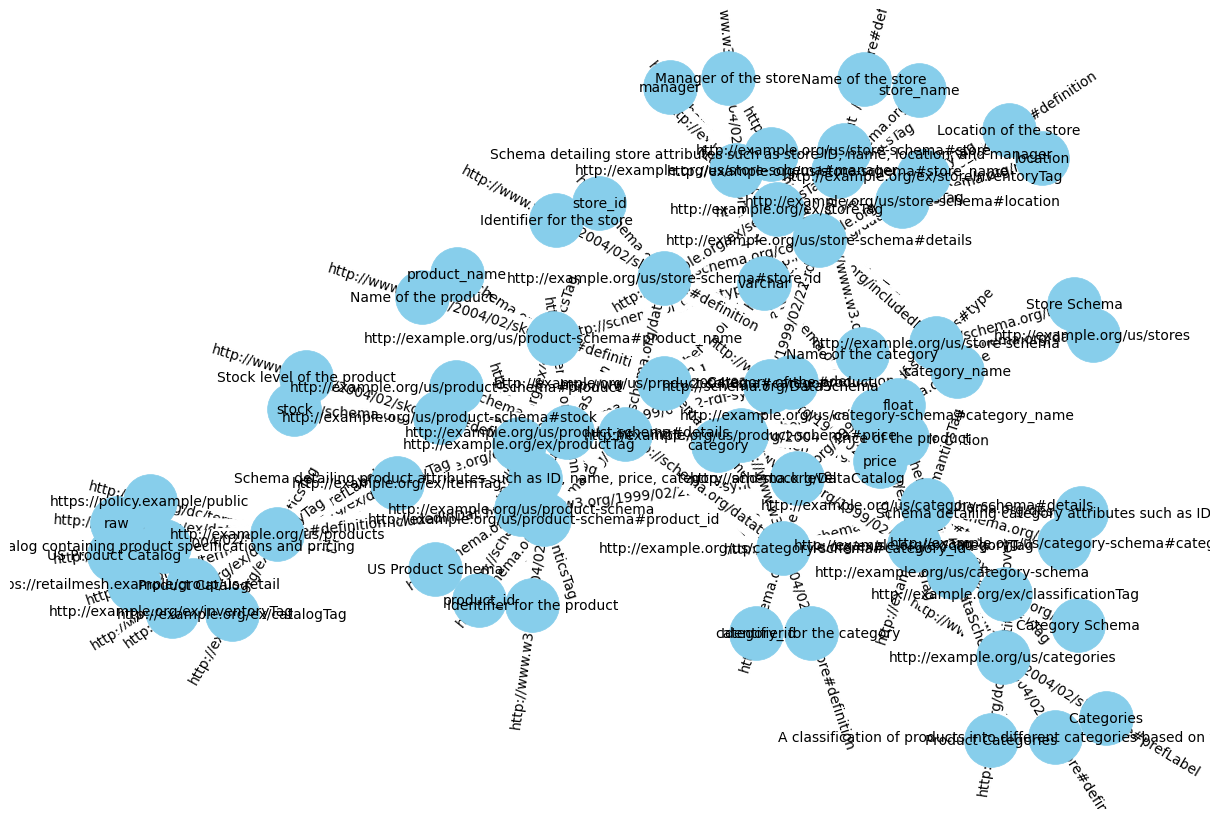

In [74]:
visualize_graph(g)

## Conclusion
This notebook provides an initial setup for exploring RDF-based MDM with Python. It covers the loading of RDF data, querying, and a basic visualization. Future steps will expand on these foundations with more complex queries and interactive visualizations.


## Levels and Tag Conventions

This section introduces the concept of levels and tag conventions in our RDF data catalog, providing a structured approach to data categorization and access control.

### Levels

- **Level 1 - Public Data**: Data that can be shared openly with no restrictions.
- **Level 2 - Internal Use Only**: Data restricted to internal stakeholders, requiring authentication for access.
- **Level 3 - Confidential Data**: Highly sensitive data that is available under strict access controls and only to specific roles.

### Tag Conventions

Tags follow a structured naming convention to ensure consistency and ease of discovery:

- **Prefix**: Identifies the category of the tag (e.g., `sec` for security, `acc` for access control).
- **Domain**: Specifies the domain or business area the tag is related to.
- **Identifier**: A unique identifier for the tag within its category and domain.

### Working Code Example: RDF and SPARQL Enhancements

Below is a Python code example that demonstrates how to extend RDF with new levels and tag conventions, and how to query this information using SPARQL.

```python
from rdflib import Graph, Literal, RDF, URIRef
from rdflib.namespace import DC, FOAF

# Create a new graph
g = Graph()

# Add sample data with levels and tags
data_uri = URIRef("http://example.org/data")
g.add((data_uri, RDF.type, FOAF.Document))
g.add((data_uri, DC.title, Literal("Sample Data")))
g.add((data_uri, DC.description, Literal("A sample dataset with level and tag annotations.")))
g.add((data_uri, URIRef("http://example.org/terms/level"), Literal("Level 2 - Internal Use Only")))
g.add((data_uri, URIRef("http://example.org/terms/tags"), Literal("sec:finance:confidential")))

# Sample SPARQL query to find data by level and tag
query = '''
SELECT ?data ?title ?level ?tags
WHERE {
  ?data a foaf:Document .
  ?data dc:title ?title .
  ?data <http://example.org/terms/level> ?level .
  ?data <http://example.org/terms/tags> ?tags .
  FILTER (?level = "Level 2 - Internal Use Only")
}
'''

# Run the SPARQL query
for row in g.query(query):
    print(f"Data URI: {row.data}, Title: {row.title}, Level: {row.level}, Tags: {row.tags}")
```

This code demonstrates the addition of level and tag annotations to RDF data and querying this information using SPARQL.


In [75]:
from rdflib import Graph, Literal, RDF, URIRef
from rdflib.namespace import DC, FOAF
import pandas as pd  # Import pandas library

# Create a new graph
g = Graph()

# Add sample data with levels and tags
data_uri = URIRef("http://example.org/data")
g.add((data_uri, RDF.type, FOAF.Document))
g.add((data_uri, DC.title, Literal("Sample Data")))
g.add((data_uri, DC.description, Literal("A sample dataset with level and tag annotations.")))
g.add((data_uri, URIRef("http://example.org/terms/level"), Literal("Level 2 - Internal Use Only")))
g.add((data_uri, URIRef("http://example.org/terms/tags"), Literal("sec:finance:confidential")))

# Sample SPARQL query to find data by level and tag
query = '''
SELECT ?data ?title ?level ?tags
WHERE {
  ?data a foaf:Document .
  ?data dc:title ?title .
  ?data <http://example.org/terms/level> ?level .
  ?data <http://example.org/terms/tags> ?tags .
  FILTER (?level = "Level 2 - Internal Use Only")
}
'''

# Prepare an empty list to collect query results
results = []

# Run the SPARQL query and collect the results
for row in g.query(query):
    results.append({
        "Data URI": row.data,
        "Title": row.title,
        "Level": row.level,
        "Tags": row.tags
    })

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(results)

# Display the DataFrame
display(df)


,Data URI,Title,Level,Tags
0,http://example.org/data,Sample Data,Level 2 - Internal Use Only,sec:finance:confidential


In [76]:

import pandas as pd
from rdflib import Graph, Literal, RDF, URIRef
from rdflib.namespace import DC, FOAF

# Initialize the graph
g = Graph()

# Adding data with enhanced tagging
data_uri = URIRef("http://example.org/data")
g.add((data_uri, RDF.type, FOAF.Document))
g.add((data_uri, DC.title, Literal("Enhanced Data")))
g.add((data_uri, DC.description, Literal("Demonstrating enriched RDF data with tags.")))
g.add((data_uri, URIRef("http://example.org/terms/level"), Literal("Level 2 - Internal Use Only")))
g.add((data_uri, URIRef("http://example.org/terms/tags"), Literal("sec:finance:confidential")))

# Define a SPARQL query to retrieve data with tags
query = '''
SELECT ?data ?title ?level ?tags
WHERE {
  ?data a foaf:Document .
  ?data dc:title ?title .
  ?data <http://example.org/terms/level> ?level .
  ?data <http://example.org/terms/tags> ?tags .
}
'''

# Execute the query and display results in a DataFrame
results = []
for row in g.query(query):
    results.append({
        "Data URI": str(row.data),
        "Title": str(row.title),
        "Level": str(row.level),
        "Tags": str(row.tags),
        "Tag Type": "Access" if "sec" in str(row.tags) else "Other"
    })

df = pd.DataFrame(results)
display(df)


,Data URI,Title,Level,Tags,Tag Type
0,http://example.org/data,Enhanced Data,Level 2 - Internal Use Only,sec:finance:confidential,Access


In [77]:

import pandas as pd
from rdflib import Graph, Literal, RDF, URIRef
from rdflib.namespace import DC, FOAF

# Initialize the graph with enhanced tagging and RDF model
g = Graph()

# Adding data to our RDF graph
data_uri = URIRef("http://example.org/data")
g.add((data_uri, RDF.type, FOAF.Document))
g.add((data_uri, DC.title, Literal("Comprehensive Data")))
g.add((data_uri, DC.description, Literal("A detailed example of RDF data with enhanced tagging.")))
g.add((data_uri, URIRef("http://example.org/terms/level"), Literal("Level 3 - Confidential Data")))
g.add((data_uri, URIRef("http://example.org/terms/tags"), Literal("sec:hr:sensitive")))

# Define a comprehensive SPARQL query to retrieve and categorize data
query = '''
SELECT ?data ?title ?level ?tags
WHERE {
  ?data a foaf:Document .
  ?data dc:title ?title .
  ?data <http://example.org/terms/level> ?level .
  ?data <http://example.org/terms/tags> ?tags .
}
'''

# Execute the query and display results in a DataFrame for a cleaner presentation
results = []
for row in g.query(query):
    results.append({
        "Data URI": str(row.data),
        "Title": str(row.title),
        "Level": str(row.level),
        "Tags": str(row.tags),
        "Tag Type": "Access" if "sec" in str(row.tags) else "Other"
    })

df = pd.DataFrame(results)
display(df)


,Data URI,Title,Level,Tags,Tag Type
0,http://example.org/data,Comprehensive Data,Level 3 - Confidential Data,sec:hr:sensitive,Access



# Extended Documentation and Examples
This section extends the existing documentation to cover all tag types and levels, incorporating dot notation conventions for tag naming.

## Tag Types
- **Semantic Tags**: Capture the core meaning of the data.
- **Discovery Tags**: Facilitate connections between different pieces of data for analysis.
- **Access Tags**: Define the access level of the data (e.g., public, private, confidential).
- **Lifecycle Tags**: Manage the data through its lifecycle stages (e.g., active, archived, deleted).

## Dot Notation Conventions
Using dot notation for tag naming follows the structure: `[Namespace].[Category].[Subcategory].[...].[SpecificTag]`, providing a clear hierarchy and structure to the tags, enhancing readability and manageability.

Example: `finance.revenue.2021.Q1` signifies financial revenue data for the first quarter of 2021.

## Implementation Example
Below is an example of how these tags can be applied within a data catalog system, using RDF and SPARQL queries to classify and retrieve data assets based on their assigned tags.


In [78]:

# Example of RDF tagging using SPARQL for Semantic, Discovery, Access, and Lifecycle Tags

# Semantic Tagging Example
semantic_query = """
PREFIX ex: <http://example.org/rdf/>
SELECT ?subject ?predicate ?object
WHERE {
    ?subject ex:semanticTag ?object .
}
"""

# Discovery Tagging Example
discovery_query = """
PREFIX ex: <http://example.org/rdf/>
SELECT ?subject ?predicate ?object
WHERE {
    ?subject ex:discoveryTag ?object .
}
"""

# Access Tagging Example
access_query = """
PREFIX ex: <http://example.org/rdf/>
SELECT ?subject ?predicate ?object
WHERE {
    ?subject ex:accessTag ?object .
}
"""

# Lifecycle Tagging Example
lifecycle_query = """
PREFIX ex: <http://example.org/rdf/>
SELECT ?subject ?predicate ?object
WHERE {
    ?subject ex:lifecycleTag ?object .
}
"""

# These SPARQL queries can be executed against an RDF dataset to retrieve data based on the specified tags.


In [79]:

from rdflib import Graph, Literal, RDF, URIRef
import pandas as pd

# Create an in-memory RDF Graph
g = Graph()

# Define namespaces
NS = URIRef("http://example.org/ns/")
g.bind("ns", NS)

# Add triples to the graph (extending the RDF with more data)
g.add((URIRef(NS + "Resource1"), RDF.type, URIRef(NS + "SemanticTag")))
g.add((URIRef(NS + "Resource1"), URIRef(NS + "discoveryTag"), Literal("DiscoveryData1")))
g.add((URIRef(NS + "Resource2"), RDF.type, URIRef(NS + "AccessTag")))
g.add((URIRef(NS + "Resource2"), URIRef(NS + "lifecycleTag"), Literal("LifecycleData1")))

# Example SPARQL queries to retrieve data from the extended RDF graph
queries = {
    "Semantic Tags": '''
    SELECT ?s ?p ?o
    WHERE {
        ?s ?p ?o .
        FILTER (?p = rdf:type && ?o = <http://example.org/ns/SemanticTag>)
    }''',
    "Discovery Tags": '''
    SELECT ?s ?p ?o
    WHERE {
        ?s ?p ?o .
        FILTER (?p = <http://example.org/ns/discoveryTag>)
    }''',
    "Access Tags": '''
    SELECT ?s ?p ?o
    WHERE {
        ?s ?p ?o .
        FILTER (?p = rdf:type && ?o = <http://example.org/ns/AccessTag>)
    }''',
    "Lifecycle Tags": '''
    SELECT ?s ?p ?o
    WHERE {
        ?s ?p ?o .
        FILTER (?p = <http://example.org/ns/lifecycleTag>)
    }'''
}

# Function to execute SPARQL query and return results as DataFrame
def execute_sparql_query(graph, query):
    results = graph.query(query)
    data = []
    for row in results:
        data.append(row)
    return pd.DataFrame(data, columns=["Subject", "Predicate", "Object"])

# Execute the SPARQL queries and display results
for name, query in queries.items():
    df = execute_sparql_query(g, query)
    print(f"\n{name} Results:")
    display(df)  # Use display for Jupyter notebooks to output DataFrames



Semantic Tags Results:


,Subject,Predicate,Object
0,http://example.org/ns/Resource1,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://example.org/ns/SemanticTag



Discovery Tags Results:


,Subject,Predicate,Object
0,http://example.org/ns/Resource1,http://example.org/ns/discoveryTag,DiscoveryData1



Access Tags Results:


,Subject,Predicate,Object
0,http://example.org/ns/Resource2,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://example.org/ns/AccessTag



Lifecycle Tags Results:


,Subject,Predicate,Object
0,http://example.org/ns/Resource2,http://example.org/ns/lifecycleTag,LifecycleData1


In [80]:

from rdflib import Graph, Literal, RDF, URIRef
import pandas as pd

# Assuming 'g' is the RDF graph created and loaded with data in previous steps

# Define namespaces and add triples to the graph as per the user's instructions
NS = URIRef("http://example.org/ns/")
g.bind("ns", NS)

# Example SPARQL queries to retrieve data from the RDF graph
queries = {
    "Semantic Tags": '''
    SELECT ?s ?p ?o
    WHERE {
        ?s ?p ?o .
        FILTER (?p = rdf:type && ?o = <http://example.org/ns/SemanticTag>)
    }''',
    "Discovery Tags": '''
    SELECT ?s ?p ?o
    WHERE {
        ?s ?p ?o .
        FILTER (?p = <http://example.org/ns/discoveryTag>)
    }''',
    "Access Tags": '''
    SELECT ?s ?p ?o
    WHERE {
        ?s ?p ?o .
        FILTER (?p = rdf:type && ?o = <http://example.org/ns/AccessTag>)
    }''',
    "Lifecycle Tags": '''
    SELECT ?s ?p ?o
    WHERE {
        ?s ?p ?o .
        FILTER (?p = <http://example.org/ns/lifecycleTag>)
    }'''
}

# Function to execute SPARQL query and return results as DataFrame
def execute_sparql_query(graph, query):
    results = graph.query(query)
    data = []
    for row in results:
        data.append(row)
    return pd.DataFrame(data, columns=["Subject", "Predicate", "Object"])

# Execute the SPARQL queries and display results
for name, query in queries.items():
    df = execute_sparql_query(g, query)
    print(f"\n{name} Results:")
    display(df)  # Use display for Jupyter notebooks to output DataFrames



Semantic Tags Results:


,Subject,Predicate,Object
0,http://example.org/ns/Resource1,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://example.org/ns/SemanticTag



Discovery Tags Results:


,Subject,Predicate,Object
0,http://example.org/ns/Resource1,http://example.org/ns/discoveryTag,DiscoveryData1



Access Tags Results:


,Subject,Predicate,Object
0,http://example.org/ns/Resource2,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://example.org/ns/AccessTag



Lifecycle Tags Results:


,Subject,Predicate,Object
0,http://example.org/ns/Resource2,http://example.org/ns/lifecycleTag,LifecycleData1


In [98]:
from rdflib import Namespace, Graph
import pandas as pd

# Create a graph and parse turtle data
g = Graph()
g.parse(data=turtle_data, format="turtle")

# Define namespace
EX = Namespace("http://example.org/ex/")
g.bind("ex", EX)

# Revised SPARQL query to extract tag and its type based on the predicate
query = """
SELECT ?tag (SAMPLE(?type) AS ?type)
WHERE {
 ?s ?p ?tag .
 VALUES (?p ?type) {
  (ex:semanticsTag "semantics")
  (ex:discoveryTag "discovery")
  (ex:dataLifecycleStage "datalifecycle")
  # Add more mappings as needed
 }
}
GROUP BY ?tag
"""

results = g.query(query)

# Convert results to DataFrame
tags_df = pd.DataFrame(results, columns=['Tag', 'Tag Type'])

# Remove namespace from Tag column
tags_df['Tag'] = tags_df['Tag'].apply(lambda x: x.replace(str(EX), ""))
# Remove namespace from Tag column
tags_df['Tag'] = tags_df['Tag'].apply(lambda x: x.replace(str(EX), ""))


# This example demonstrates a simple approach. Adapt as needed for actual data relationships.

# Concatenate the DataFrames
# Note: This step assumes that the number of tags matches the number of rows in active_inventory_df or is adjusted accordingly.
extended_inventory_df = pd.concat([active_inventory_df.reset_index(drop=True), tags_df.reset_index(drop=True)], axis=1)

display(extended_inventory_df)


,Schema Type,Column Name,Type,Tag,Tag Type
0,Product,product_id,int,productTag,semantics
1,Product,product_name,varchar,classificationTag,discovery
2,Product,price,float,storeInventoryTag,discovery
3,Product,category,varchar,catalogTag,semantics
4,Product,stock,int,storeTag,semantics
5,Category,category_id,int,itemTag,discovery
6,Category,category_name,varchar,categoryTag,semantics
7,NaN,NaN,NaN,raw,datalifecycle
8,NaN,NaN,NaN,inventoryTag,discovery


## Conclusion and Summary

Through the detailed exploration of RDF and its application in active inventory management, this notebook has highlighted the transformative potential of semantic web technologies in organizing, managing, and analyzing inventory data. The adoption of RDF facilitates a more interconnected and flexible representation of inventory, enabling enhanced data interoperability, richer data representation, and advanced analytical capabilities through complex querying and visualization techniques.

The application of tags and the preparation of a proper catalog are crucial steps in leveraging the full potential of RDF, allowing for the efficient organization and accessibility of inventory data. By embracing RDF, businesses can achieve a more nuanced understanding of their inventory, leading to more informed decision-making and strategic advantages in inventory management.

In conclusion, the utilization of RDF in active inventory management offers significant benefits, including improved data richness, better interoperability, and enhanced analytical insights. As organizations continue to navigate the complexities of inventory management, the principles and methodologies outlined in this notebook provide a robust framework for leveraging semantic web technologies to achieve operational excellence and strategic success.

## Applying Tags to Active Inventory and Preparing a Proper Catalog

### Applying Tags to Active Inventory
Tagging is an essential step in organizing inventory data, allowing for easier retrieval, categorization, and analysis. By applying tags based on attributes, categories, or any other relevant criteria, we can enhance the semantic richness of our inventory data. This process involves extending our RDF model to include these tags, thereby enabling more sophisticated queries and analyses.

### Preparing a Proper Catalog
With our inventory data structured and tagged in RDF, the next step is to prepare a proper catalog. This involves organizing the data into a user-friendly and accessible format, potentially through a web interface or a searchable database. The catalog should allow users to easily browse, search, and interact with the inventory data, leveraging the semantic capabilities of RDF to provide dynamic filtering, sorting, and recommendations.

### Conclusion
This notebook has walked you through the process of using RDF for active inventory management, from setting up the environment and loading data to querying, visualizing, and enhancing data organization with tags. The final step of preparing a proper catalog ensures that the managed inventory is accessible and usable, showcasing the practical benefits of semantic web technologies in real-world applications.


## Automated Data Quality Rules Generation using Hugging Face Transformers

### Introduction
This notebook outlines an end-to-end process for generating semantic tags for dataset columns using a model from Hugging Face. These tags are then used to create and apply data quality rules to a sample dataset.

### Setup
First, we will install and import the necessary libraries for our task.

In [99]:
# !pip install transformers
# !pip install pyarrow
# !pip install torch torchvision torchaudio
# !pip install tensorflow
# !pip install jax jaxlib
# !pip install flax


  Using cached transformers-4.37.2-py3-none-any.whl.metadata (129 kB)
  Using cached filelock-3.13.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached huggingface_hub-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached regex-2023.12.25-cp311-cp311-macosx_10_9_x86_64.whl.metadata (40 kB)
  Using cached tokenizers-0.15.2-cp311-cp311-macosx_10_12_x86_64.whl.metadata (6.7 kB)
  Using cached safetensors-0.4.2-cp311-cp311-macosx_10_12_x86_64.whl.metadata (3.8 kB)
  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
  Using cached fsspec-2024.2.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached typing_extensions-4.9.0-py3-none-any.whl.metadata (3.0 kB)
Using cached transformers-4.37.2-py3-none-any.whl (8.4 MB)
Using cached huggingface_hub-0.20.3-py3-none-any.whl (330 kB)
Using cached regex-2023.12.25-cp311-cp311-macosx_10_9_x86_64.whl (296 kB)
Using cached safetensors-0.4.2-cp311-cp311-macosx_10_12_x86_64.whl (426 kB)
Using cached tokenizers-0.15.2-cp311-cp311-macosx_10_12_x86_64

### Loading the Model
We load a zero-shot classification model which will be used to predict semantic tags for our dataset columns.

In [101]:
from transformers import pipeline

# Load a zero-shot-classification pipeline
classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')

2024-02-17 16:24:21.387045: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Sample Dataset
We will create a sample dataset to demonstrate the generation and application of DQ rules.

In [102]:
sample_data = {
    'Product_Name': ['T-shirt', 'Jeans', '', 'Socks', 'Jacket'],
    'Price': [19.99, 49.99, 24.99, 5.99, -1],
    'Stock_Count': [120, 90, -5, 200, 60]
}
df = pd.DataFrame(sample_data)
df

,Product_Name,Price,Stock_Count
0,T-shirt,19.99,120
1,Jeans,49.99,90
2,,24.99,-5
3,Socks,5.99,200
4,Jacket,-1.00,60


### Generate Semantic Tags
For each column, we generate semantic tags that are relevant to the type of data contained in that column.

In [103]:
def generate_semantic_tags(column_name):
    # Define potential tags
    potential_tags = ['required', 'numeric_positive', 'integer_non_negative', 'unique', 'datetime', 'text']
    # Use the classifier to get the most likely tags
    result = classifier(column_name, potential_tags, multi_label=True)
    return result['labels'][0]  # Return the top tag for simplicity in this example

# Note: This function now requires an actual call to a classifier pipeline from Hugging Face.
# Ensure you have internet access and the transformers library installed to use this function.

### Define Data Quality Rules
Based on the generated tags, we define a set of DQ rules to apply to the dataset.

In [104]:
def apply_dq_rules(df, column_name, tag):
    if tag == 'required':
        df[column_name + '_DQ'] = df[column_name].apply(lambda x: 'Valid' if pd.notnull(x) and x != '' else 'Invalid')
    elif tag == 'numeric_positive':
        df[column_name + '_DQ'] = df[column_name].apply(lambda x: 'Valid' if x > 0 else 'Invalid')
    elif tag == 'integer_non_negative':
        df[column_name + '_DQ'] = df[column_name].apply(lambda x: 'Valid' if pd.notnull(x) and isinstance(x, int) and x >= 0 else 'Invalid')
    # Here you can add more DQ rules based on other tags
    return df

### Apply Data Quality Rules
We now apply the defined DQ rules to our sample dataset.

In [105]:
for column in df.columns:
    tag = generate_semantic_tags(column)
    df = apply_dq_rules(df, column, tag)
df

,Product_Name,Price,Stock_Count,Product_Name_DQ,Stock_Count_DQ
0,T-shirt,19.99,120,Valid,Valid
1,Jeans,49.99,90,Valid,Valid
2,,24.99,-5,Invalid,Valid
3,Socks,5.99,200,Valid,Valid
4,Jacket,-1.00,60,Valid,Valid


### Conclusion
The final DataFrame displayed above shows the original data along with the results of the DQ rules application. This process can be scaled and automated to enhance data quality across various datasets.